## Telco Customer Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline



In [3]:
df = pd.read_csv( r"C:\Users\raval\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv", encoding='unicode_escape')

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.shape

(7043, 21)

In [10]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print('-' * 40)


Unique values in 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
Unique values in 'gender':
['Female' 'Male']
----------------------------------------
Unique values in 'SeniorCitizen':
[0 1]
----------------------------------------
Unique values in 'Partner':
['Yes' 'No']
----------------------------------------
Unique values in 'Dependents':
['No' 'Yes']
----------------------------------------
Unique values in 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------
Unique values in 'PhoneService':
['No' 'Yes']
----------------------------------------
Unique values in 'MultipleLines':
['No phone service' 'No' 'Yes']
----------------------------------------
Unique values in 'Inter

In [18]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [20]:
df['TotalCharges'].min()

0.0

In [22]:
df['TotalCharges'].max()

8684.8

In [24]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [80]:
df['SeniorCitizen'].unique()

array([nan], dtype=object)

## Data   visulization

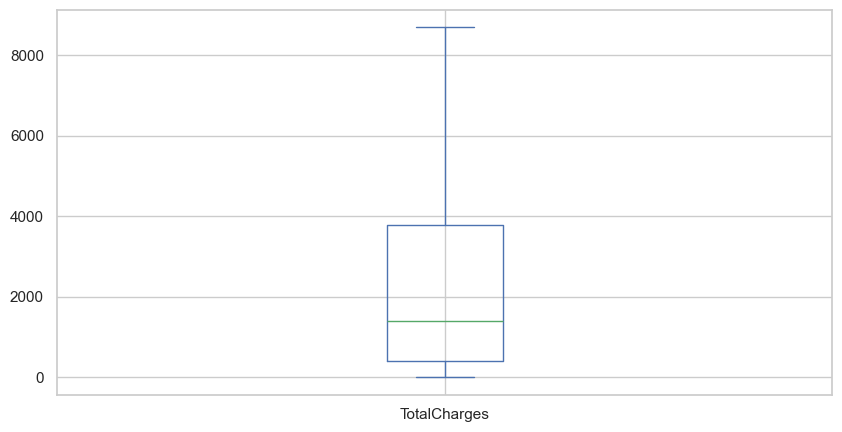

In [82]:
df['TotalCharges'].plot(kind='box', figsize=(10,5))
plt.show()

C:\Users\raval\AppData\Local\Temp\ipykernel_22504\3117527641.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


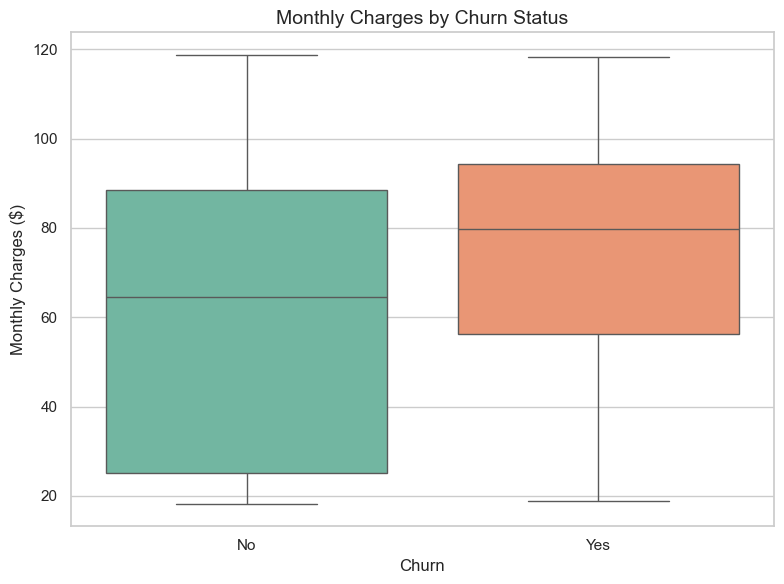

In [68]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Plot boxplot: MonthlyCharges vs Churn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')

# Titles and labels
plt.title("Monthly Charges by Churn Status", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Monthly Charges ($)")
plt.tight_layout()
plt.show()


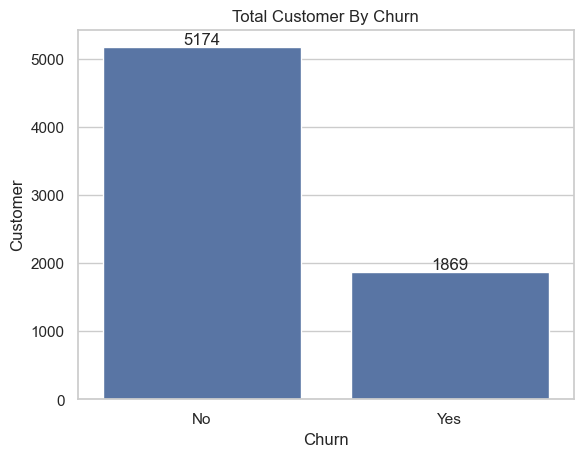

In [56]:
ax = sns.countplot(x= 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Total Customer By Churn")
plt.xlabel("Churn")
plt.ylabel("Customer")
plt.show()

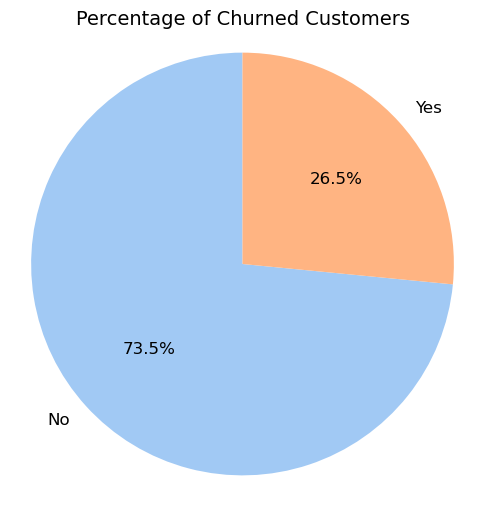

In [32]:

gb = df.groupby('Churn').agg({'Churn': 'count'})
colors = sns.color_palette("pastel")[0:2]

plt.figure(figsize=(6, 6))
plt.pie(gb['Churn'], 
        labels=gb.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors,
        textprops={'fontsize': 12})

plt.title("Percentage of Churned Customers", fontsize=14)
plt.axis('equal')  # Ensures the pie is a circle
plt.show()


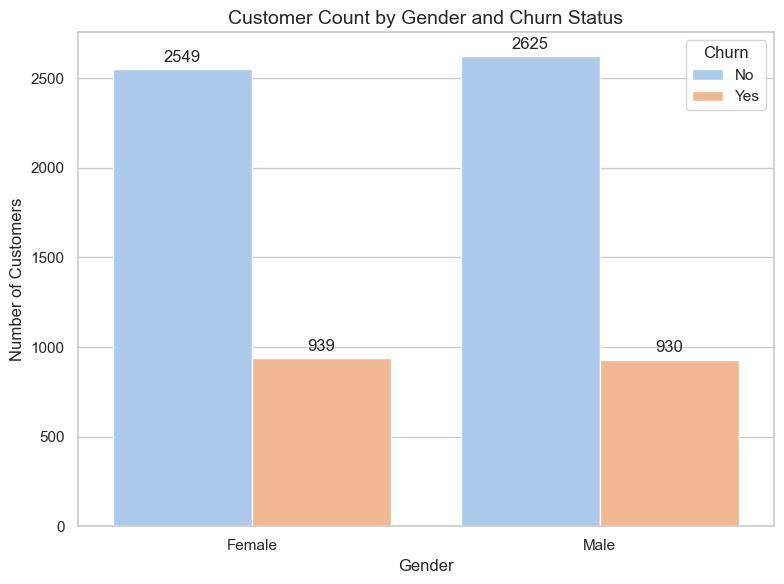

In [34]:

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='Churn', data=df, palette='pastel')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title("Customer Count by Gender and Churn Status", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")

plt.tight_layout()
plt.show()


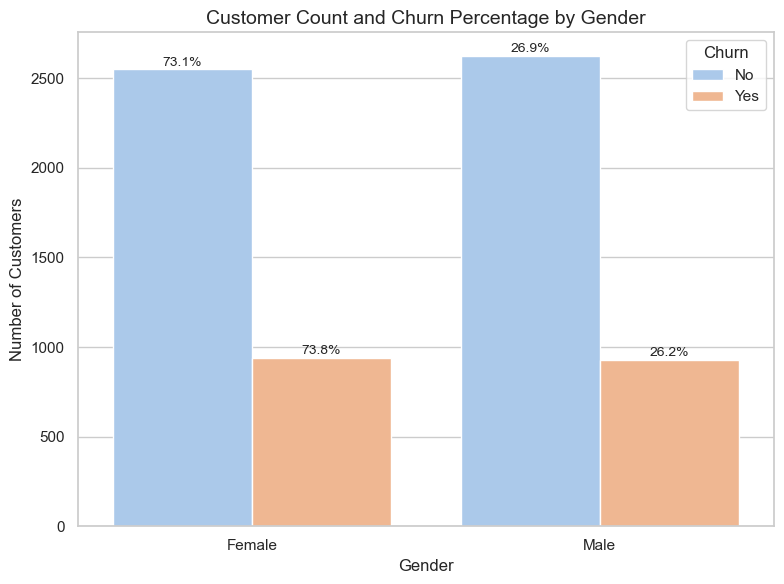

In [38]:
sns.set(style="whitegrid")

count_data = df.groupby(['gender', 'Churn']).size().reset_index(name='count')
total_by_gender = count_data.groupby('gender')['count'].transform('sum')
count_data['percentage'] = (count_data['count'] / total_by_gender * 100).round(1)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gender', y='count', hue='Churn', data=count_data, palette='pastel')

for container, gender_group in zip(ax.containers, count_data['gender'].unique()):
    for bar, (_, row) in zip(container, count_data[count_data['gender'] == gender_group].iterrows()):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{row['percentage']}%", 
                ha='center', va='bottom', fontsize=10)

plt.title("Customer Count and Churn Percentage by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


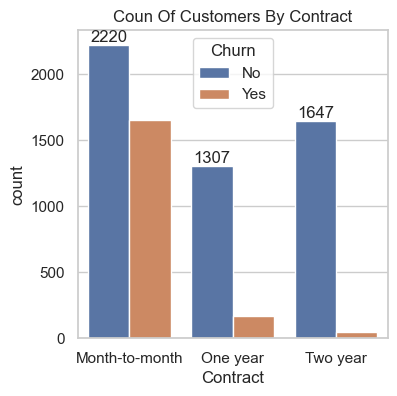

In [64]:
plt.figure(figsize = (4,4))
ax = sns.countplot( x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Coun Of Customers By Contract")
plt.show()

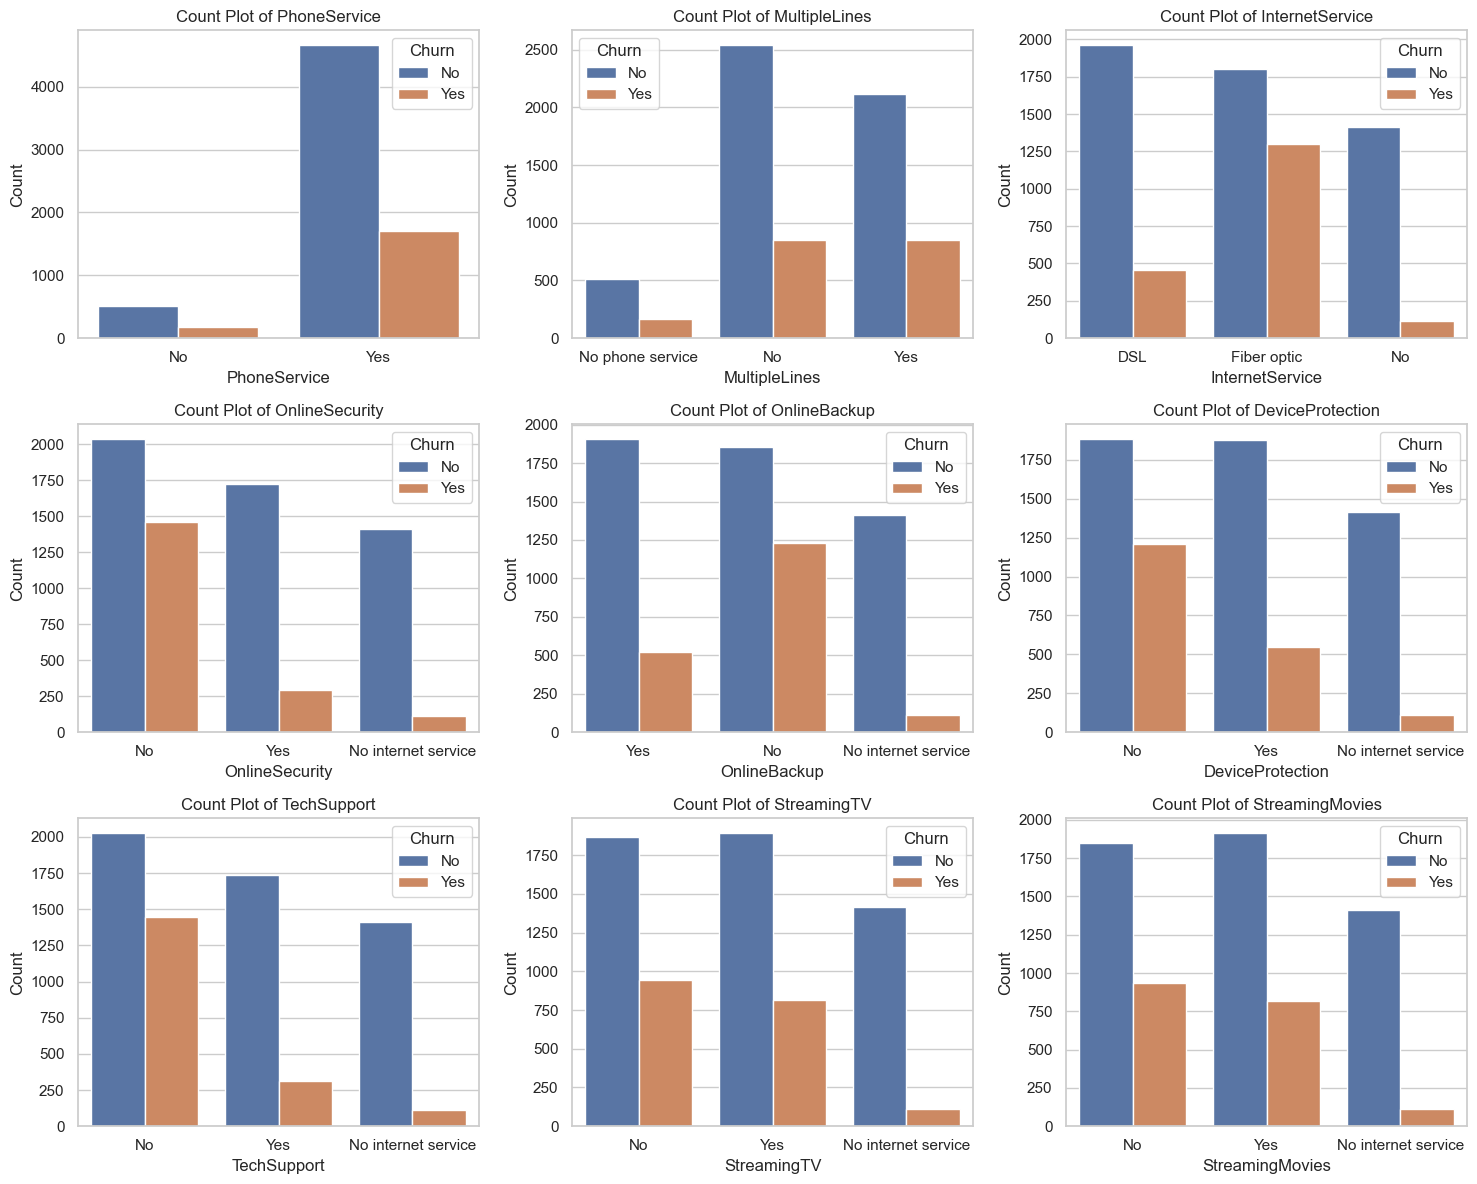

In [66]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn")  # Fixed hue
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Fixed typo (was "tight layout")
plt.show()

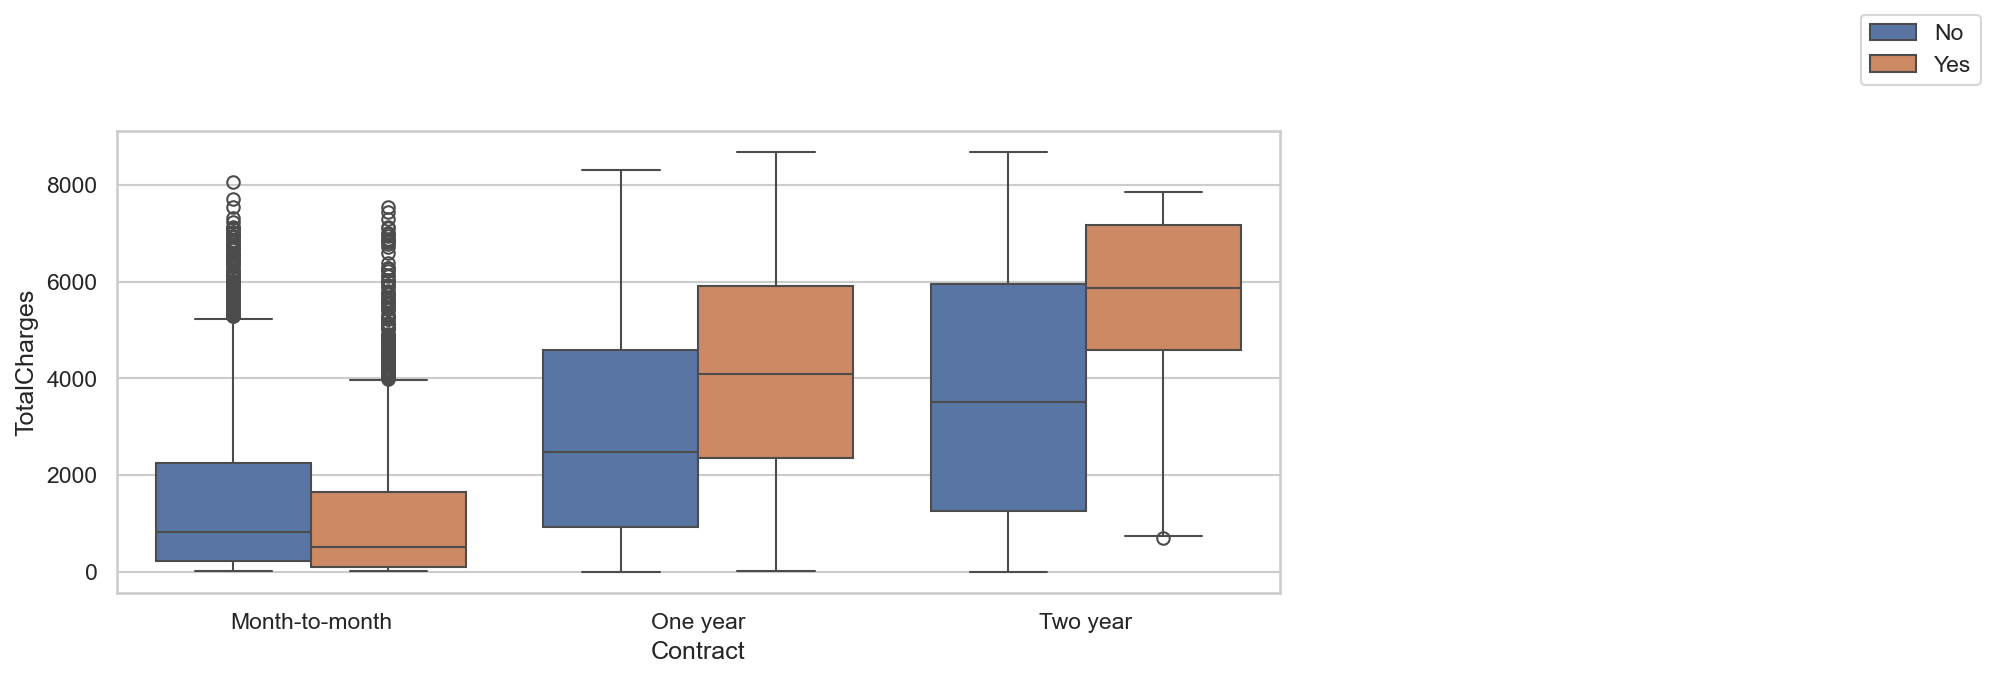

In [89]:

plt.figure(dpi=150, figsize=(10,4))
sns.boxplot(data=df, y = 'TotalCharges', x = 'Contract', hue = 'Churn')
plt.legend(loc = (1.5,1.1))
plt.show()

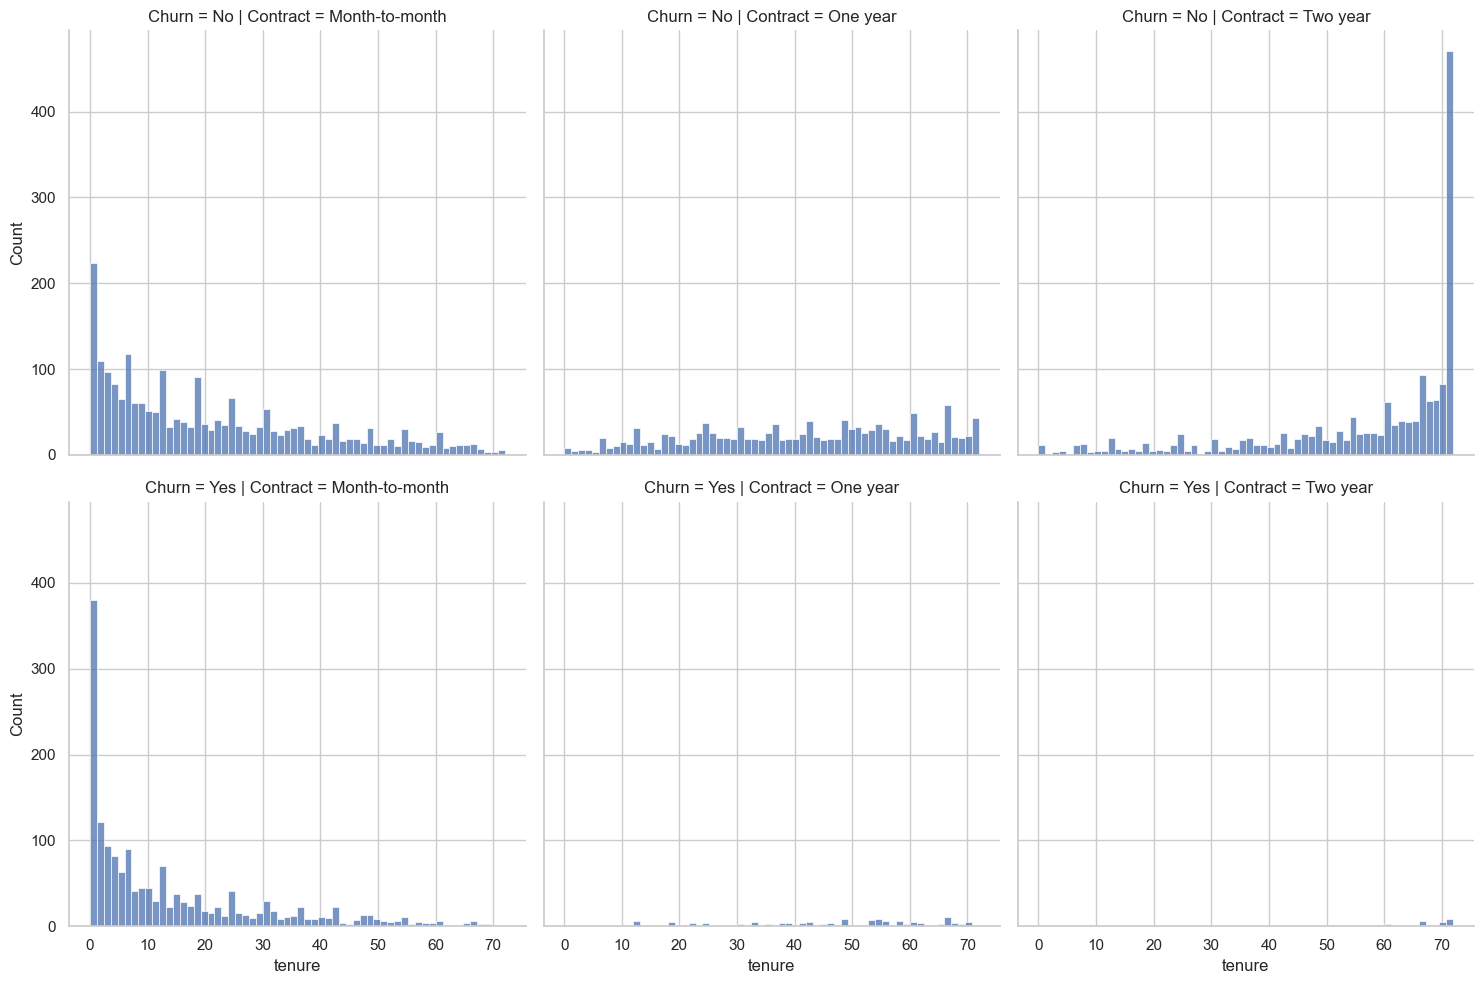

In [100]:
sns.displot(data = df, x= 'tenure', bins = 60, col = 'Contract', row = 'Churn');
plt.show()



In [104]:

corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [106]:
corr_df

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
gender_Female,1.000000,-1.000000,-0.001808,0.001808,0.010517,-0.010517,-0.006488,0.006488,-0.004476,-0.006488,...,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744,-0.008612,0.008612
gender_Male,-1.000000,1.000000,0.001808,-0.001808,-0.010517,0.010517,0.006488,-0.006488,0.004476,0.006488,...,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744,0.008612,-0.008612
Partner_No,-0.001808,0.001808,1.000000,-1.000000,0.452676,-0.452676,0.017706,-0.017706,0.129929,0.017706,...,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125,-0.150448,0.150448
Partner_Yes,0.001808,-0.001808,-1.000000,1.000000,-0.452676,0.452676,-0.017706,0.017706,-0.129929,-0.017706,...,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.150448,-0.150448
Dependents_No,0.010517,-0.010517,0.452676,-0.452676,1.000000,-1.000000,-0.001762,0.001762,-0.023198,-0.001762,...,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071,-0.164221,0.164221
Dependents_Yes,-0.010517,0.010517,-0.452676,0.452676,-1.000000,1.000000,0.001762,-0.001762,0.023198,0.001762,...,0.068368,0.204613,0.111377,-0.111377,0.052021,0.060267,-0.150642,0.059071,0.164221,-0.164221
PhoneService_No,-0.006488,0.006488,0.017706,-0.017706,-0.001762,0.001762,1.000000,-1.000000,-0.315431,1.000000,...,0.002791,-0.003519,0.016505,-0.016505,-0.007556,0.007721,-0.003062,0.003319,0.011942,-0.011942
PhoneService_Yes,0.006488,-0.006488,-0.017706,0.017706,0.001762,-0.001762,-1.000000,1.000000,0.315431,-1.000000,...,-0.002791,0.003519,-0.016505,0.016505,0.007556,-0.007721,0.003062,-0.003319,-0.011942,0.011942
MultipleLines_No,-0.004476,0.004476,0.129929,-0.129929,-0.023198,0.023198,-0.315431,0.315431,1.000000,-0.315431,...,0.002098,-0.102937,0.151864,-0.151864,-0.070178,-0.063921,-0.080836,0.222605,0.032569,-0.032569
MultipleLines_No phone service,-0.006488,0.006488,0.017706,-0.017706,-0.001762,0.001762,1.000000,-1.000000,-0.315431,1.000000,...,0.002791,-0.003519,0.016505,-0.016505,-0.007556,0.007721,-0.003062,0.003319,0.011942,-0.011942


In [108]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]


Contract_Two year                         -0.302253
TechSupport_No internet service           -0.227890
StreamingTV_No internet service           -0.227890
DeviceProtection_No internet service      -0.227890
StreamingMovies_No internet service       -0.227890
OnlineBackup_No internet service          -0.227890
OnlineSecurity_No internet service        -0.227890
InternetService_No                        -0.227890
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup_Yes                          -0.082255
DeviceProtec

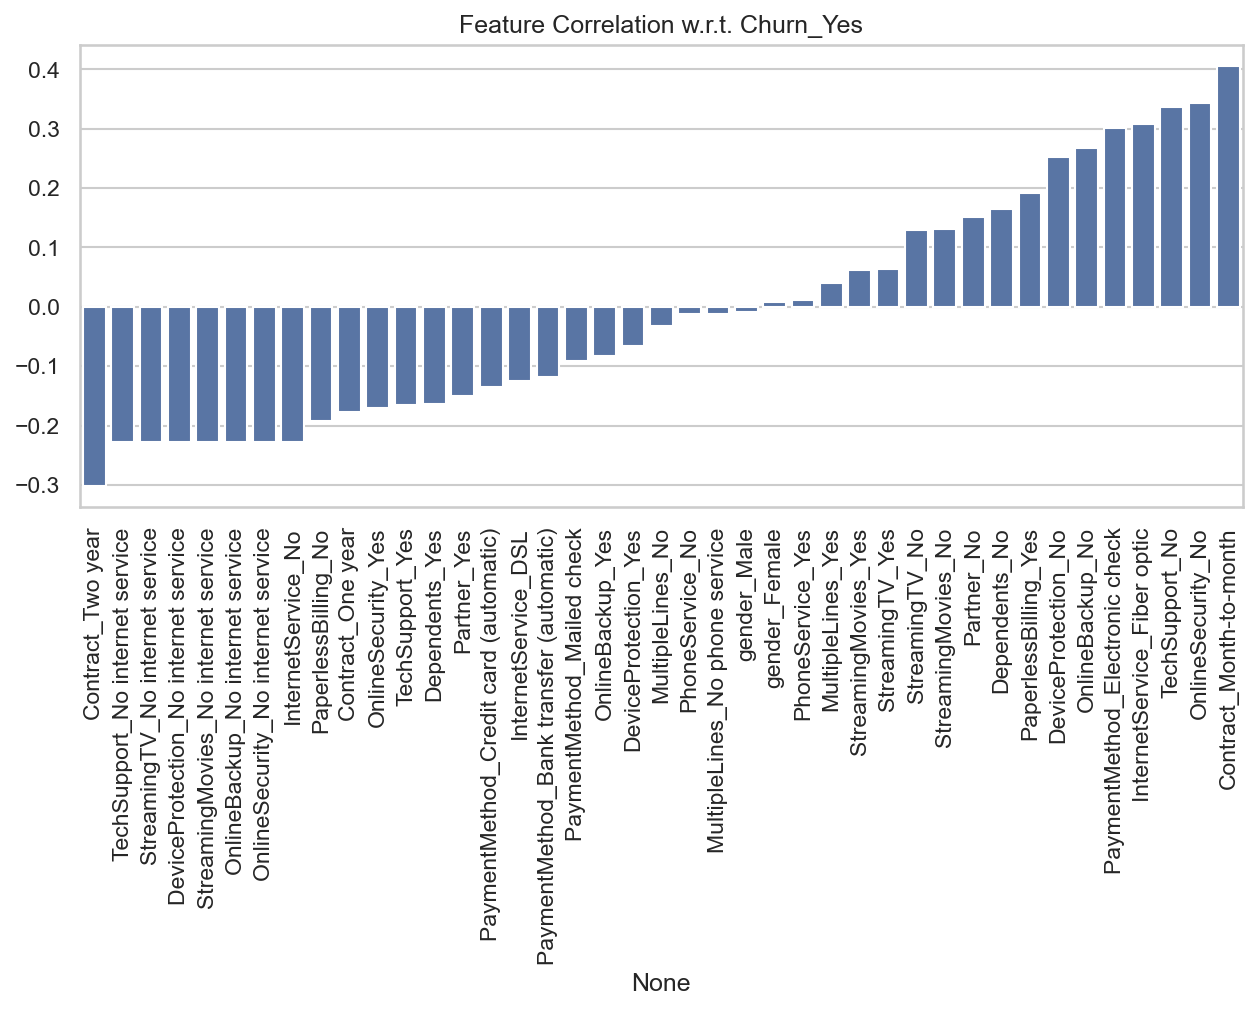

In [114]:
plt.figure(figsize = (10,4), dpi =150)
sns.barplot(x = corr_df['Churn_Yes'].sort_values().iloc[1:-1].index, y = corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation w.r.t. Churn_Yes")
plt.xticks(rotation = 90);
plt.show()